In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

# Restaurant Reviews

This is a simplified fictional example showing Simpson's Paradox: trends that are present when looking at a segmented version of the data can be reversed when aggregating the data. 

In [2]:
data = pd.DataFrame({'A Ratings': [6.5, 8.5], 'B Ratings': [8, 9], 
                     'A Number': [10, 300], 'B Number': [180, 40], 
                     'Gender': ['M', 'F']}).set_index('Gender')
data

,A Ratings,B Ratings,A Number,B Number
Gender,,,,
M,6.5,8,10,180
F,8.5,9,300,40


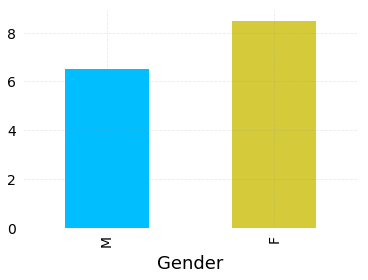

In [3]:
ax = data['A Ratings'].plot.bar()

In [4]:
a_average = (data.loc[:, 'A Ratings'] * data.loc[:, 'A Number']).sum() / data.loc[:, 'A Number'].sum(axis=0)
b_average = (data.loc[:, 'B Ratings'] * data.loc[:, 'B Number']).sum() / data.loc[:, 'B Number'].sum(axis=0)


data.loc['Combined'] = [a_average, 
                        b_average, 
                        data['A Number'].sum(), 
                        data['B Number'].sum()]
data.round(2)

,A Ratings,B Ratings,A Number,B Number
Gender,,,,
M,6.50,8.00,10.0,180.0
F,8.50,9.00,300.0,40.0
Combined,8.44,8.18,310.0,220.0


# Hours of Exercise vs Chance of a Heart Attack

This is another fictional example showing Simpson's Paradox in the context of a correlation. When looking at the data individually, there is a negative correlation between hours of exercise and chance of a heart attack, but when aggregating the data, the correlation reverses! 

In [5]:
from numpy.polynomial.polynomial import polyfit

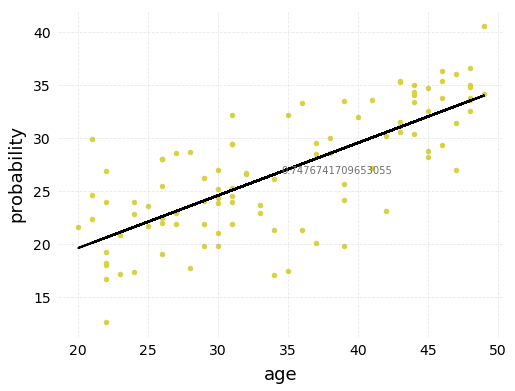

In [21]:
n_samples = 100
ages = np.random.randint(20, 50, n_samples)
hours = np.random.randint(1, 5, n_samples) + np.random.randn(n_samples)
p = 15 + 0.5 * ages + -2.1 * hours + np.random.randn(n_samples) *  2
under_50 = pd.DataFrame({'age': ages, 'hours': hours, 'probability': p})


def plot_relationship(data, c, color = '#d9d142'):
    """Plot a scatter plot with linear fit"""
    x, y = np.array(data[c]), np.array(data['probability'])
    # Linear fit (polynomial of degree 1)
    b, m = polyfit(x, y, 1)
    # Plot scatterplot
    data.plot(x = c, y = 'probability', kind = 'scatter', 
              color = color, figsize = (8, 6))
    # Plot linear fit
    plt.plot(x, m * x + b, '-', color = 'k');
    if color == 'b':
        plt.title(f'Probability vs {c.capitalize()} under 50')
    elif color == 'r':
        plt.title(f'Probability vs {c.capitalize()} over 50')
    corr_coef = np.corrcoef(x, y)[0][1]
    ax = plt.gca()
    plt.text(0.2, 0.8, f'{round(corr_coef, 2)}', transform=ax.transAxes)

plot_relationship(under_50, 'age', '#d9d142')

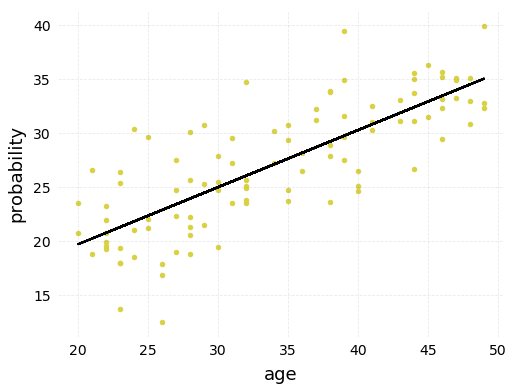

In [16]:
plot_relationship(under_50, 'age')

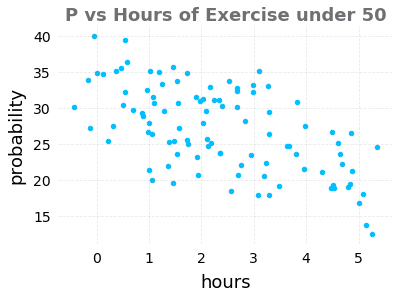

In [17]:
under_50.plot(x = 'hours', y = 'probability', kind = 'scatter', title = 'P vs Hours of Exercise under 50');

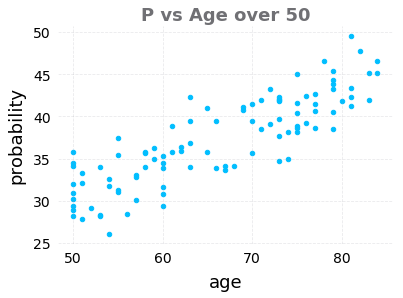

In [18]:
n_samples = 100
ages = np.random.randint(50, 85, n_samples)
hours = np.random.randint(5, 10, n_samples) + np.random.randn(n_samples) * 0.5
p = 25 + 0.4 * ages + -2 * hours + np.random.randn(n_samples) 
over_50 = pd.DataFrame({'age': ages, 'hours': hours, 'probability': p})

over_50.plot(x = 'age', y = 'probability', kind = 'scatter', title = 'P vs Age over 50');

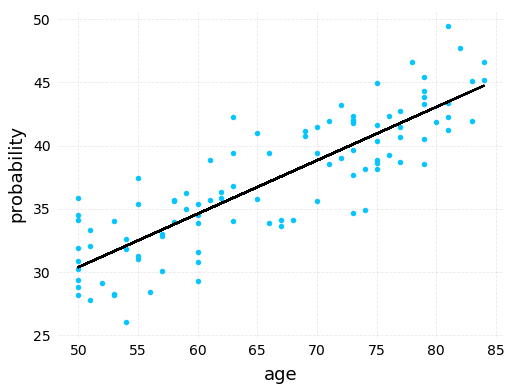

In [19]:
plot_relationship(over_50, 'age', '#04c5ff')

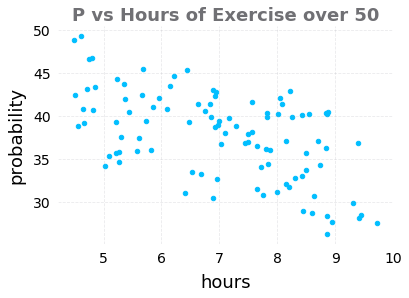

In [45]:
over_50.plot(x = 'hours', y = 'probability', kind = 'scatter', title = 'P vs Hours of Exercise over 50');

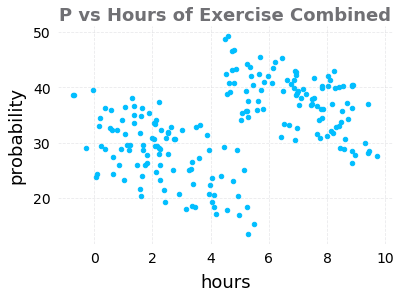

In [46]:
combined = pd.concat([under_50, over_50], axis = 0)
combined.plot(x = 'hours', y = 'probability', kind = 'scatter', title = 'P vs Hours of Exercise Combined');